In [1]:
%matplotlib inline
import matplotlib
import pandas as pd
import quandl #to get stock data
import numpy as np
import datetime
import warnings; warnings.simplefilter('ignore') #ignoring constant warnings in Jupyter Notebook
import matplotlib.pyplot as plt #to graph predicitons

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, cross_validation, svm 

/srv/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#creating a dataframe holding stock from company of choice in format "WIKI/companyticker", here we use Chipotle, Inc., where the ticker is CMG

#df = quandl.get("WIKI/CMG")

df = quandl.get("NSE/SBIN", start_date="2008-12-31", end_date="2018-03-10")

#looking at the head of the whole dataframe
print(df)

               Open     High      Low     Last    Close  Total Trade Quantity  \
Date                                                                            
2008-12-31  1308.00  1308.00  1270.00  1290.00  1288.80             2704078.0   
2009-01-01  1329.00  1329.00  1284.10  1313.70  1316.30             1899777.0   
2009-01-02  1315.00  1350.00  1312.20  1331.30  1331.85             2416165.0   
2009-01-05  1354.00  1377.65  1348.00  1358.00  1360.80             2693191.0   
2009-01-06  1388.70  1388.70  1298.00  1326.25  1322.85             3597096.0   
2009-01-07  1325.00  1349.65  1220.10  1245.00  1240.05             3726858.0   
2009-01-09  1220.00  1251.70  1176.35  1224.00  1221.10             2499651.0   
2009-01-12  1205.00  1223.20  1108.35  1166.00  1158.90             4092767.0   
2009-01-13  1145.00  1186.30  1140.40  1174.00  1174.90             2284456.0   
2009-01-14  1180.00  1211.45  1171.40  1200.20  1196.90             1722546.0   
2009-01-15  1175.00  1175.00

In [4]:
#isolating the Adj. Close column we will use in our predictions 
#df = df[['Adj. Close']]
df = df[['Close']]


#forecasting 30 days into the future 
forecast = int(30)
#label column with data shifted 30 units
#df['Prediction'] = df[['Adj. Close']].shift(-forecast)
df['Prediction'] = df[['Close']].shift(-forecast)

#seeing the head of the dataframe to be used for prediction
print(df.tail())

             Close  Prediction
Date                          
2018-03-05  263.50         NaN
2018-03-06  256.55         NaN
2018-03-07  246.65         NaN
2018-03-08  256.80         NaN
2018-03-09  253.25         NaN


In [5]:
#X variable will be an array of the Adj. Close values, need to get rid of prediction column
X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:] #setting X_forecast equal to last 30 
X = X[:-forecast] #remove last 30 from X

y = np.array(df['Prediction']) #result of interest, array holding just the prediction values
y = y[:-forecast] #Clearing out the last 30 from Y


In [6]:
#Linear Regression
#Starting the training process, test size will be 20% of data

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size = 0.2)

#initiate linear regression model and fit with training data
#training
clf = LinearRegression() #creating model stored in clf variable
clf.fit(X_train, y_train) #fitting the model with the training data

#testing 
confidence = clf.score(X_test, y_test) 
print("confidence: ", confidence)

#predicting our X_forecast values
forecast_prediction = clf.predict(X_forecast) #calling the model to predict the X_forecast variable and storing into variable forecast_prediction
print(forecast_prediction)

confidence:  0.905540729485
[ 384.34156294  368.54271287  367.5523372   368.91999885  368.63703437
  361.84588688  353.63991699  354.30016744  348.35791339  349.34828906
  357.45993745  352.74386281  345.5282686   333.69092124  336.04895856
  329.39929331  326.42816628  327.51286345  330.95559794  330.29534749
  333.549439    332.04029511  325.57927284  325.95655882  320.43875148
  321.71209163  315.15674788  305.81892007  315.39255161  312.04413861]


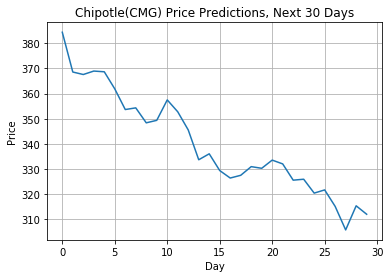

In [7]:
#graphing our predictions 
plt.plot(forecast_prediction)
plt.xlabel('Day')
plt.ylabel('Price')
plt.grid(True)
plt.title('Chipotle(CMG) Price Predictions, Next 30 Days')
